In [2]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from imgaug import augmenters as iaa

c:\Users\kanna\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## FEATURE EXTRACTION AND DATA PRE-PROCESSING

In [3]:
data_dir = "D:\\PLANT_DISEASE\\archive (7)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train_final" 

In [4]:
feature_vectors = []
labels = []

In [5]:
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

In [6]:
augmentation = iaa.Sequential([
    iaa.Fliplr(0.5),  # 50% horizontal flips
    iaa.Affine(rotate=(-10, 10)),  # Random rotations between -10 and 10 degrees
    iaa.GaussianBlur(sigma=(0, 1.0)),  # Gaussian blur with a sigma between 0 and 1.0
    iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),  # Gaussian noise
])

In [7]:
for class_label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_label)
    
    if not os.path.isdir(class_dir):
        continue

    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)

        image = cv2.imread(image_path)
        
        # Apply image augmentation
        # image = augmentation.augment_image(image)

        image = cv2.resize(image, (128, 128))
        
        # Convert the image to grayscale (optional)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')

        feature_vectors.append(features)
        labels.append(class_label)

In [8]:
feature_vectors

[array([0.2306182 , 0.13346892, 0.22842676, ..., 0.2008946 , 0.08372439,
        0.0774525 ]),
 array([0.30268497, 0.03407904, 0.10203084, ..., 0.13499041, 0.09386709,
        0.0188746 ]),
 array([0.24507741, 0.16712842, 0.09481246, ..., 0.21598185, 0.13302201,
        0.05906967]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.26896884, 0.06819541, 0.06751796, ..., 0.12907258, 0.22681382,
        0.12307657]),
 array([0.12067994, 0.06029988, 0.02615877, ..., 0.10159426, 0.10573402,
        0.1693393 ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.14337981, 0.03607985, 0.14257316, ..., 0.19394747, 0.173526  ,
        0.15666971]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.15013769, 0.18806132, 0.09449181, ..., 0.09926599, 0.10428593,
        0.05731488]),
 array([0.53333671, 0.02430443, 0.00851027, ..., 0.1360495 , 0.13725736,
        0.09420267]),
 array([0.16412188, 0.08704129, 0.08575131, ..., 0.06727034, 0.053802  ,
        0.09400519]),
 array([0.27051795, 0.081765

In [9]:
labels

['Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___

In [10]:
X = np.array(feature_vectors)

In [11]:
y = np.array(labels)

In [12]:
print(X)

[[0.2306182  0.13346892 0.22842676 ... 0.2008946  0.08372439 0.0774525 ]
 [0.30268497 0.03407904 0.10203084 ... 0.13499041 0.09386709 0.0188746 ]
 [0.24507741 0.16712842 0.09481246 ... 0.21598185 0.13302201 0.05906967]
 ...
 [0.22472384 0.17387665 0.06076164 ... 0.19280963 0.22150087 0.08089366]
 [0.13373838 0.23024784 0.04265059 ... 0.18660502 0.13951595 0.        ]
 [0.22160249 0.14613205 0.12106675 ... 0.07971506 0.12589608 0.18472035]]


In [13]:
X.shape,y.shape

((7500, 8100), (7500,))

In [14]:
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)
y_enc

array([ 0,  0,  0, ..., 14, 14, 14], dtype=int64)

## 

In [15]:
df = pd.DataFrame(y,y_enc)
df

,0
0,Apple___Black_rot
0,Apple___Black_rot
0,Apple___Black_rot
0,Apple___Black_rot
0,Apple___Black_rot
...,...
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [16]:
df.drop_duplicates(inplace=True)
df

,0
0,Apple___Black_rot
1,Blueberry___healthy
2,Cherry_(including_sour)___Powdery_mildew
3,Corn_(maize)___Common_rust_
4,Grape___Black_rot
5,Orange___Haunglongbing_(Citrus_greening)
6,Peach___Bacterial_spot
7,"Pepper,_bell___Bacterial_spot"
8,Potato___Early_blight
9,Raspberry___healthy


## MODEL TRAINING 

In [17]:
nb_model = GaussianNB()

In [18]:
nb_model.fit(X, y_enc)

GaussianNB()

# VALIDATING THE MODEL

In [19]:
data_valid_dir = "D:\\PLANT_DISEASE\\archive (7)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid" 

In [20]:
feature_vectors_valid = []
labels_valid = []

In [21]:
for class_label in os.listdir(data_valid_dir):
    class_dir = os.path.join(data_valid_dir, class_label)
    
    if not os.path.isdir(class_dir):
        continue

    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)

        image = cv2.imread(image_path)

        image = cv2.resize(image, (128, 128))

        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')

        feature_vectors_valid.append(features)
        labels_valid.append(class_label)

In [22]:
feature_vectors_valid

[array([0.21328912, 0.        , 0.16700493, ..., 0.07994909, 0.22296044,
        0.14305417]),
 array([0.15237508, 0.07036889, 0.14665507, ..., 0.21957034, 0.12652922,
        0.13956495]),
 array([0.18057921, 0.00663334, 0.04575824, ..., 0.13672808, 0.13693613,
        0.10316129]),
 array([0.14837934, 0.06614929, 0.07827395, ..., 0.23985809, 0.09318912,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.21607873, 0.13672199, 0.04116568, ..., 0.15775564, 0.13203765,
        0.04620745]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.2919783 , 0.04812105, 0.07872579, ..., 0.0538613 , 0.17429683,
        0.06966076]),
 array([0.22895477, 0.14064216, 0.1700406 , ..., 0.16830015, 0.17651345,
        0.09511412]),
 array([0.23984255, 0.07865992, 0.12987424, ..., 0.13177663, 0.17392774,
        0.08521013]),
 array([0.15702468, 0.24735834, 0.0691484 , ..., 0.23629224, 0.22758263,
        0.12082506]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.23606311, 0.026144

In [23]:
labels_valid

['Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___

In [24]:
X_valid = np.array(feature_vectors_valid)
y_valid = np.array(labels_valid)

## LABEL ENCODING (PRE-PROCESSING)

In [25]:
label_encoder = LabelEncoder()
y_valid = label_encoder.fit_transform(y_valid)

In [26]:
y_valid_pred = nb_model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
class_report_valid = classification_report(y_valid, y_valid_pred)

In [27]:
accuracy_valid

0.6193333333333333

## VISUALISATION METRICS FOR VALIDATION

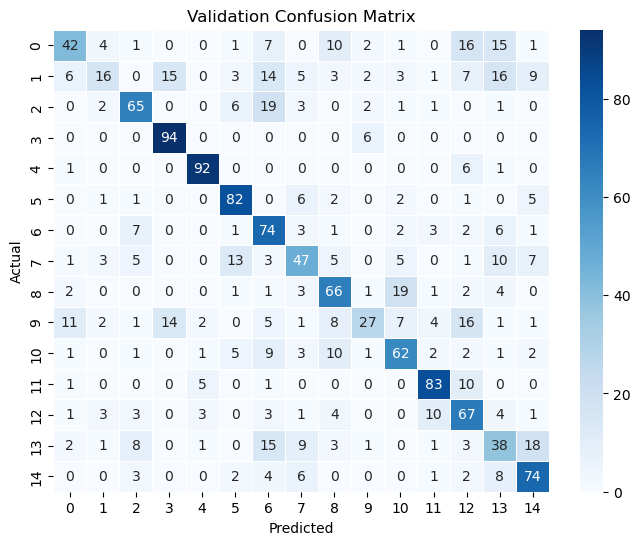

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_valid, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [29]:
import pandas as pd
from sklearn.metrics import classification_report

# Your code for calculating classification_report

# Convert classification_report to a dictionary
class_report_dict = classification_report(y_valid, y_valid_pred, output_dict=True)

# Create a Pandas DataFrame from the dictionary
classification_report_df = pd.DataFrame(class_report_dict)

# Print the DataFrame
print('Validation Classification Report:')
classification_report_df


Validation Classification Report:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,accuracy,macro avg,weighted avg
precision,0.617647,0.500000,0.684211,0.764228,0.884615,0.719298,0.477419,0.540230,0.589286,0.642857,0.607843,0.775701,0.496296,0.361905,0.621849,0.619333,0.618892,0.618892
recall,0.420000,0.160000,0.650000,0.940000,0.920000,0.820000,0.740000,0.470000,0.660000,0.270000,0.620000,0.830000,0.670000,0.380000,0.740000,0.619333,0.619333,0.619333
f1-score,0.500000,0.242424,0.666667,0.843049,0.901961,0.766355,0.580392,0.502674,0.622642,0.380282,0.613861,0.801932,0.570213,0.370732,0.675799,0.619333,0.602599,0.602599
support,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.619333,1500.000000,1500.000000


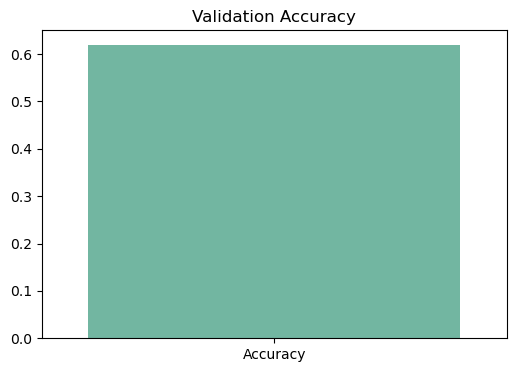

In [30]:
# Create a Seaborn barplot for accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy_valid], palette='Set2')
plt.title('Validation Accuracy')
plt.show()

## MODEL TESTING

In [31]:
class_dir_test = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_final"

In [32]:
feature_test=[]
label_test=[]

In [33]:
for image_file in os.listdir(class_dir_test):
    image_path = os.path.join(class_dir_test, image_file)
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Resize the image to a fixed size (e.g., 128x128 pixels)
    image = cv2.resize(image, (128, 128))
    
    # Convert the image to grayscale (optional)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Extract HOG features from the image
    features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                    cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
    
    # Append the feature vector and label to the respective lists
    feature_test.append(features)
    label_test.append(image_file)

In [34]:
feature_test

[array([0.17569234, 0.06930438, 0.14314371, ..., 0.        , 0.21528088,
        0.0906029 ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.38116011, 0.        , 0.        , ..., 0.2942634 , 0.2942634 ,
        0.2942634 ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.34665116, 0.2475154 , 0.        , ..., 0.06811334, 0.09349503,
        0.14697103]),
 array([0.21684064, 0.03302376, 0.11586406, ..., 0.11799789, 0.10853052,
        0.10196612]),
 array([0.21679891, 0.05887299, 0.12048961, ..., 0.10753159, 0.04857285,
        0.        ]),
 array([0.20518527, 0.15536076, 0.13425269, ..., 0.12229223, 0.13323229,
        0.11584329]),
 array([0.23169404, 0.05120109, 0.09467042, ..., 0.18466962, 0.11242249,
        0.2215013 ]),
 array([0.23211236, 0.10355923, 0.2093943 , ..., 0.0656748 , 0.10546845,
        0.17560894]),
 array([0.20376697, 0.11517297, 0.1362592 , ..., 0.12960245, 0.07519557,
        0.0

In [35]:
label_test

['Apple_Black_rot (2).JPG',
 'Apple_Black_rot (3).JPG',
 'Apple___Black_rot.JPG',
 'Corn_(maize)___Common_rust_ (1).JPG',
 'Corn_(maize)___Common_rust_ (2).JPG',
 'Corn_(maize)___Common_rust_ (3).JPG',
 'Corn_(maize)___Common_rust_.JPG',
 'ganesh.JPG',
 'Grape_Black_rot (1).JPG',
 'Grape_Black_rot (2).JPG',
 'Grape_Black_rot (3).JPG',
 'Grape___Black_rot.JPG',
 'Orange_Haunglingbing (1).JPG',
 'Orange_Haunglingbing (2).JPG',
 'Orange_Haunglingbing (3).JPG',
 'Orange___Haunglongbing_(Citrus_greening).JPG',
 'Peach_Bacterial_spot (1).JPG',
 'Peach_Bacterial_spot (2).JPG',
 'Peach_Bacterial_spot (3).JPG',
 'Peach___Bacterial_spot.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight4.JPG',
 'Potato___Early_blight.JPG',
 'Squash___Powdery_mildew.JPG',
 'Strawberry_lear_scorch (1).JPG',
 'Strawberry_lear_scorch (2).JPG',
 'Strawberry___Leaf_scorch.JPG',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus (4).JPG',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus (5).JPG',
 'Tomato___

In [36]:
x_test =np.array(feature_test)
y_test = np.array([0,0,0,0,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,8,8,8,8,11,12,12,12,14,14,14,14])


In [37]:
y_test_pred = nb_model.predict(x_test)

In [38]:
y_test.shape

(32,)

In [39]:
y_test_pred.shape

(32,)

In [40]:
y_test

array([ 0,  0,  0,  0,  3,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  6,
        6,  6,  6,  8,  8,  8,  8, 11, 12, 12, 12, 14, 14, 14, 14])

In [41]:
y_test_pred

array([ 0,  0,  0,  3,  3,  3,  9,  7,  4,  4,  4,  4,  7,  5,  5,  5,  6,
        6,  6,  6,  8,  8, 10,  8, 11, 12, 12, 13, 14, 13, 14,  0],
      dtype=int64)

### ACCURACY BEFORE HYPERPARAMETER TUNING

In [42]:
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_valid = confusion_matrix(y_test, y_test_pred)
class_report_valid = classification_report(y_test, y_test_pred, zero_division=1)

In [43]:
accuracy_test

0.75

## GRID SEARCH (HYPER PARAMETER TUNING)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Assuming you have X as feature matrix and y_enc as label vector
equal_priors = [1/15] * 15
# Define the parameter grid
param_grid = {
    'priors': [
        None,  # Estimate priors from data
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05,0.03, 0.05, 0.04, 0.01, 0.01, 0.01],
        equal_priors
        # Another set of priors
        # Add more sets of priors if needed
    ],
}

# Create the Grid Search object
grid_search_nb = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

grid_search_nb.fit(X, y_enc)

best_params_nb = grid_search_nb.best_params_
best_model_nb = grid_search_nb.best_estimator_

print("Best Hyperparameters:", best_params_nb)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


Best Hyperparameters: {'priors': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.03, 0.05, 0.04, 0.01, 0.01, 0.01]}


## RESULTS OF EACH FIT

In [45]:
import pandas as pd

results = grid_search_nb.cv_results_

results_df = pd.DataFrame(results)

results_df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.791687,0.474118,9.473324,0.863137,None,{'priors': None},0.608667,0.625333,0.648667,0.635333,0.621333,0.627867,0.013462,2
1,4.915904,0.382004,9.612447,0.641550,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05,...","{'priors': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,...",0.610667,0.624667,0.648000,0.635333,0.622667,0.628267,0.012597,1
2,8.250331,1.943614,7.794235,0.773330,"[0.06666666666666667, 0.06666666666666667, 0.0...","{'priors': [0.06666666666666667, 0.06666666666...",0.608667,0.625333,0.648667,0.635333,0.621333,0.627867,0.013462,2


# TUNED MODEL TRANING 

In [46]:
nb_model_tuned = GaussianNB(priors=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.03, 0.05, 0.04, 0.01, 0.01, 0.01])

In [47]:
nb_model_tuned.fit(X, y_enc)

GaussianNB(priors=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.03, 0.05,
                   0.04, 0.01, 0.01, 0.01])

In [48]:
class_dir_test = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_final"

In [49]:
feature_test=[]
label_test=[]

In [50]:
for image_file in os.listdir(class_dir_test):
    image_path = os.path.join(class_dir_test, image_file)
    
    image = cv2.imread(image_path)
    
    image = cv2.resize(image, (128, 128))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                    cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
    
    feature_test.append(features)
    label_test.append(image_file)

In [51]:
x_test =np.array(feature_test)
y_test = np.array([0,0,0,0,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,8,8,8,8,11,12,12,12,14,14,14,14])


In [52]:
y_test_pred = nb_model_tuned.predict(x_test)

## ACCURACY IMPROVEMENT AFTER TUNING

In [53]:
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_valid = confusion_matrix(y_test, y_test_pred)
class_report_valid = classification_report(y_test, y_test_pred, zero_division=1)

In [54]:
accuracy_test

0.75

## BAYESIAN OPTIMIZATION

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from bayes_opt import BayesianOptimization

# Objective function for BayesianOptimization
def objective(alpha, fit_prior):
    nb_model = GaussianNB(alpha=alpha, fit_prior=bool(fit_prior))

    # Using cross_val_score for simplicity, you can replace this with your preferred evaluation method
    score = cross_val_score(nb_model, X, y_enc, cv=5, scoring='accuracy').mean()

    return score

# Define the search space for BayesianOptimization
pbounds = {'alpha': (1e-9, 1.0), 'fit_prior': (0, 1)}

# Create and run BayesianOptimization
bo = BayesianOptimization(f=objective, pbounds=pbounds, random_state=42)
bo.maximize(init_points=5, n_iter=5)

# Get the best hyperparameters
best_params_bayesian_opt = bo.max['params']
best_model_bayesian_opt = GaussianNB(**best_params_bayesian_opt)

print("Best Hyperparameters:", best_params_bayesian_opt)


|   iter    |  target   |   alpha   | fit_prior |
-------------------------------------------------


| 1         | 0.5553    | 0.3745    | 0.9507    |
| 2         | 0.5561    | 0.732     | 0.5987    |
| 3         | 0.5543    | 0.156     | 0.156     |
| 4         | 0.5544    | 0.05808   | 0.8662    |
| 5         | 0.5556    | 0.6011    | 0.7081    |
| 6         | 0.556     | 0.992     | 0.6362    |
| 7         | 0.5564    | 0.9354    | 0.2396    |
| 8         | 0.556     | 1.0       | 0.0       |
| 9         | 0.5563    | 0.9614    | 0.2317    |
| 10        | 0.5563    | 0.6856    | 0.1578    |
Best Hyperparameters: {'alpha': 0.9354126457325571, 'fit_prior': 0.23962707309036702}


In [56]:
import pandas as pd

# Extract relevant information from the BayesianOptimization object
all_params = bo.res
params = [result['params'] for result in all_params]
values = [result['target'] for result in all_params]

# Create a DataFrame
bayesian_results_df = pd.DataFrame(params, columns=['alpha', 'fit_prior'])
bayesian_results_df['accuracy'] = values

# Display the DataFrame
bayesian_results_df


,alpha,fit_prior,accuracy
0,0.374540,0.950714,0.555333
1,0.731994,0.598658,0.556133
2,0.156019,0.155995,0.554267
3,0.058084,0.866176,0.554400
4,0.601115,0.708073,0.555600
5,0.991991,0.636231,0.556000
6,0.935413,0.239627,0.556400
7,1.000000,0.000000,0.556000
8,0.961446,0.231660,0.556267
9,0.685602,0.157779,0.556267


In [57]:
best_alpha = best_params_bayesian_opt['alpha']
best_fit_prior = bool(best_params_bayesian_opt['fit_prior'])

nb_model_bayesian_opt = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)
nb_model_bayesian_opt.fit(X, y_enc)

MultinomialNB(alpha=0.9354126457325571)

In [58]:
class_dir_test = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_final"

In [59]:
feature_test=[]
label_test=[]

In [60]:
for image_file in os.listdir(class_dir_test):
    image_path = os.path.join(class_dir_test, image_file)

    image = cv2.imread(image_path)
    
    image = cv2.resize(image, (128, 128))

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                    cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')

    feature_test.append(features)
    label_test.append(image_file)

In [61]:
x_test =np.array(feature_test)
y_test = np.array([0,0,0,0,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,8,8,8,8,11,12,12,12,14,14,14,14])


In [63]:
y_test_pred = nb_model_bayesian_opt.predict(x_test)

In [64]:
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_valid = confusion_matrix(y_test, y_test_pred)
class_report_valid = classification_report(y_test, y_test_pred, zero_division=1)

## ACCURACY SCORE AFTER BAYESIAN OPTIMISATION

In [65]:
accuracy_test

0.78125

## ERROR CURVE

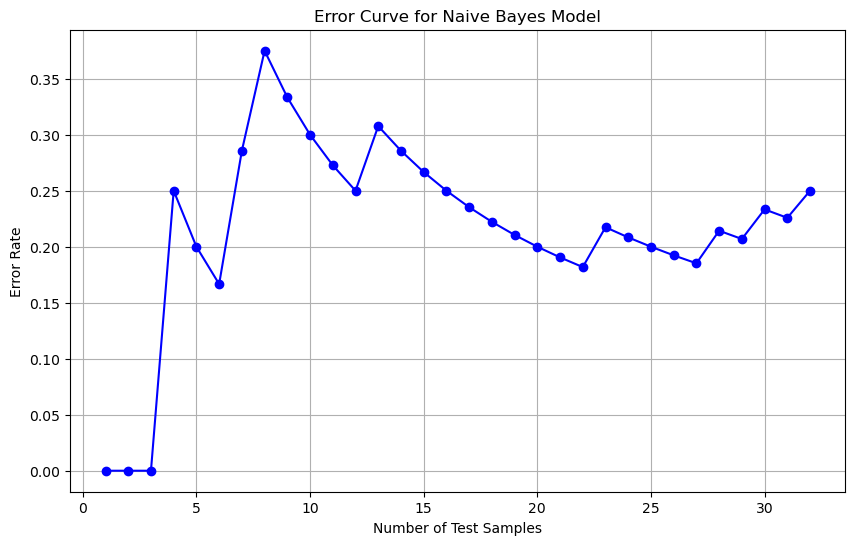

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have X_test, y_test, and nb_model defined

# Make predictions on the test set
y_pred = nb_model.predict(x_test)

# Calculate accuracy for different numbers of samples
error_rate_values = [1 - accuracy_score(y_test[:i + 1], y_pred[:i + 1]) for i in range(len(y_test))]

# Plot the error curve
x_values = range(1, len(y_test) + 1)
plt.figure(figsize=(10, 6))
plt.plot(x_values, error_rate_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Test Samples')
plt.ylabel('Error Rate')
plt.title('Error Curve for Naive Bayes Model')
plt.grid(True)
plt.show()

## PERFORMANCE METRICS

In [68]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test,y_test_pred)
conf_matrix = confusion_matrix(y_test,y_test_pred)
class_report = classification_report(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred, average='weighted')
recall = recall_score(y_test,y_test_pred, average='weighted')
f1 = f1_score(y_test,y_test_pred, average='weighted')

c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1

In [69]:
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
})

metrics_df

,Metric,Value
0,Accuracy,0.781250
1,Precision,0.885417
2,Recall,0.781250
3,F1-Score,0.818304


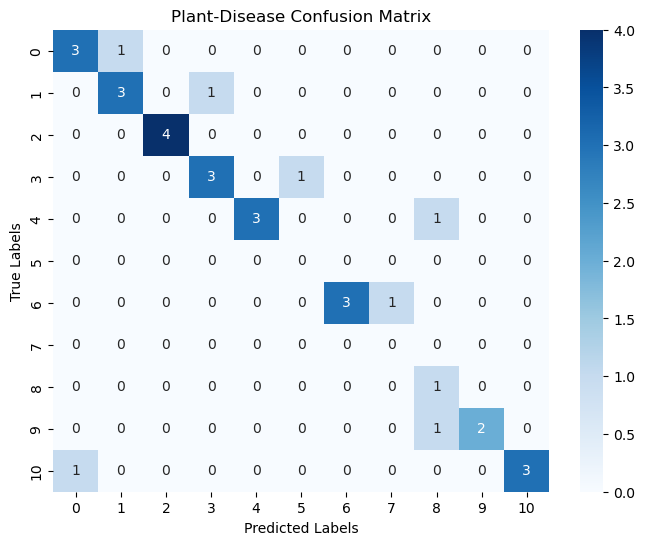

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Plant-Disease Confusion Matrix')

plt.show()

# SAVING THE TUNED MODEL

In [71]:
from joblib import dump

dump(nb_model_bayesian_opt, 'NB_PLANT_DISEASE.joblib')

['NB_PLANT_DISEASE.joblib']

## IMAGE TRANSFORMATION

In [112]:
test_image_path = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_final\\Grape_Black_rot (3).JPG"

In [113]:
image = cv2.imread(test_image_path)

In [114]:
image

array([[[158, 159, 163],
        [169, 170, 174],
        [134, 135, 139],
        ...,
        [133, 134, 144],
        [143, 144, 154],
        [126, 127, 137]],

       [[166, 167, 171],
        [185, 186, 190],
        [147, 148, 152],
        ...,
        [123, 124, 134],
        [ 81,  82,  92],
        [112, 113, 123]],

       [[128, 129, 133],
        [140, 141, 145],
        [142, 143, 147],
        ...,
        [125, 126, 136],
        [152, 153, 163],
        [173, 174, 184]],

       ...,

       [[178, 177, 179],
        [175, 174, 176],
        [174, 173, 175],
        ...,
        [153, 153, 159],
        [159, 159, 165],
        [163, 163, 169]],

       [[171, 170, 172],
        [176, 175, 177],
        [178, 177, 179],
        ...,
        [151, 151, 157],
        [161, 161, 167],
        [173, 173, 179]],

       [[163, 162, 164],
        [174, 173, 175],
        [179, 178, 180],
        ...,
        [143, 143, 149],
        [151, 151, 157],
        [166, 166, 172]]

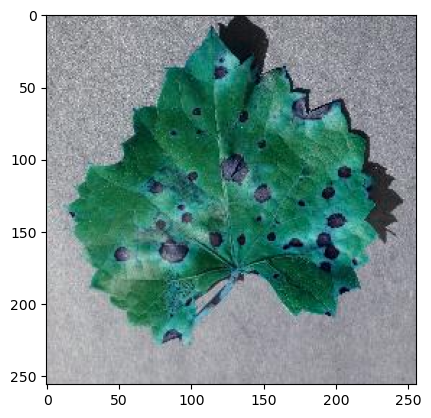

In [115]:
plt.imshow(image)
plt.show()

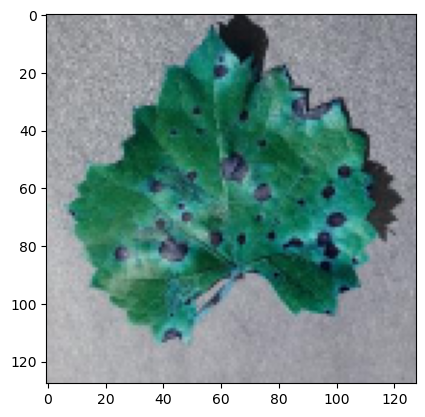

In [116]:
image = cv2.resize(image, (128, 128))
plt.imshow(image)
plt.show()

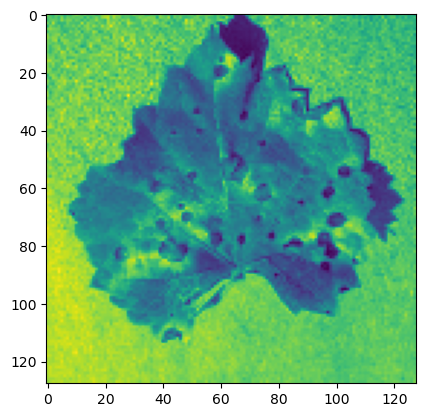

In [117]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
plt.show()

In [118]:
x_test = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
x_test

array([0.23169404, 0.05120109, 0.09467042, ..., 0.18466962, 0.11242249,
       0.2215013 ])

## PREDICTIVE SYSTEM (USING THE SAVED MODEL)

In [119]:
from joblib import load
loaded_nb_model = load("D:\\PLANT_DISEASE\\archive (7)\\NB_PLANT_DISEASE.joblib")

In [120]:
y_test_pred = loaded_nb_model.predict(x_test.reshape(1, -1))

In [121]:
y_test_pred[0]

4

In [122]:
dict = {
    0	: "Apple-Black-rot",
1:	"Blueberry-healthy",
2:	"Cherry-Powdery-mildew",
3:	"Corn-(maize)-Common-rust",
4:	"Grape-Black-rot",
5:	"Orange-Haunglongbing-(Citrus_greening)",
6:	"Peach-Bacterial-spot",
7:	"Pepper-bell-Bacterial-spot",
8:	"Potato-Early-blight",
9:	"Raspberry-healthy",
10:	"Soybean-healthy",
11:	"Squash-Powdery-mildew",
12:	"Strawberry-Leaf-scorch",
13:	"Tomato-Early-blight",
14:	"Tomato-Tomato-Yellow-Leaf-Curl-Viru",
    
}

In [123]:
dict[y_test_pred[0]]

'Grape-Black-rot'

## VISUALISATION (USING DIMENSIONALITY REDUCTION)

In [85]:
X.shape,y.shape

((7500, 8100), (7500,))

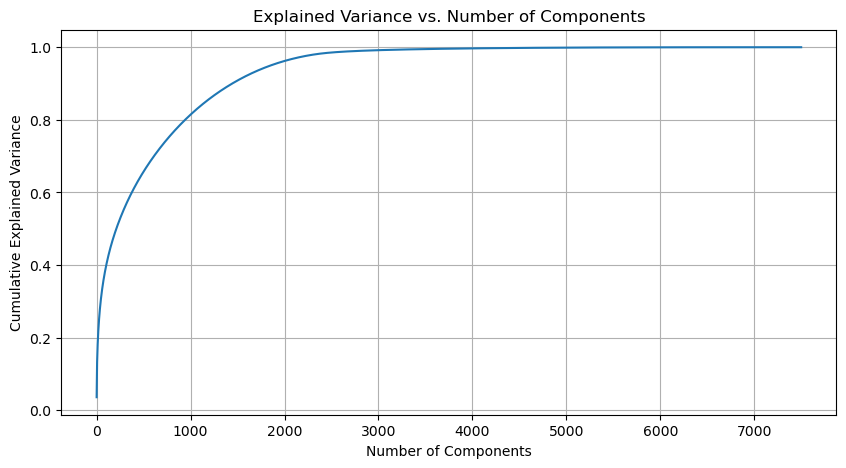

In [86]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()

pca.fit(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3000)

x_pca = pca.fit_transform(X)


In [88]:
x_pca.shape,y.shape


((7500, 3000), (7500,))

In [89]:
df = pd.DataFrame(x_pca)
df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,-0.353252,-0.840564,-0.994494,0.593439,-0.196132,-0.118514,0.855202,-0.894554,-0.382983,-0.007882,...,-0.026859,-0.038659,-0.015057,-0.016779,-0.004322,0.009771,0.012215,0.019195,-0.000756,0.029681
1,-0.355191,-1.243878,-0.178584,0.753212,-0.100948,0.360354,-0.335312,-0.399458,-0.417149,-0.010448,...,-0.018740,0.004498,-0.004006,0.012655,-0.018702,0.013947,0.014309,0.022979,-0.008648,-0.012255
2,-0.424512,-1.113491,-0.297861,0.680344,-0.176030,0.325187,0.309495,-0.526262,0.525315,0.542422,...,0.021484,-0.000024,0.001692,-0.008410,-0.003154,-0.000046,0.025833,-0.008345,0.000841,-0.022643
3,2.171722,0.318889,-0.603505,4.362394,-0.173255,0.122178,0.583696,-0.252044,0.456435,-0.211913,...,-0.030193,-0.011241,-0.017960,-0.002299,0.000805,0.002894,-0.016526,0.005135,-0.017182,-0.008422
4,-0.141556,-0.156856,-0.337249,-0.491358,0.315878,1.144522,0.383253,-0.282857,-2.107894,-0.050300,...,0.017121,-0.002029,-0.009936,-0.001850,-0.029330,-0.020354,0.029246,0.001962,-0.000135,0.023863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-1.024795,1.735009,2.549669,-0.769239,1.731102,-1.708029,1.893686,0.129349,-0.042068,0.891799,...,-0.018766,-0.041342,0.036859,0.008638,0.018643,0.008508,-0.010981,0.002227,0.006955,0.021127
7496,-0.269296,-0.966391,1.949614,0.777088,-1.224380,-1.294816,-0.416970,-0.801767,0.004220,-0.478731,...,-0.002090,-0.015751,-0.001248,0.043089,0.014064,0.019493,-0.051161,0.037760,0.024590,0.033255
7497,-0.871903,0.322688,-1.376373,-0.335832,0.613099,-0.675550,0.072168,0.488077,-0.282086,-0.608641,...,-0.000669,-0.005350,0.009207,0.017316,0.011539,-0.015527,-0.019349,0.013023,-0.021251,0.007649
7498,-0.686404,0.039189,-0.349691,-0.109039,-1.929338,0.361172,-1.067934,1.454776,0.611792,-0.528178,...,0.027240,-0.019345,0.002588,0.008068,0.011446,0.037937,-0.006160,0.043784,0.050507,-0.005737


## HYPER - PARAMETER PLOT

|   iter    |  target   |   alpha   | fit_prior |
-------------------------------------------------
| 11        | 0.5543    | 0.02058   | 0.9699    |
| 12        | 0.5564    | 0.8324    | 0.2123    |
| 13        | 0.5544    | 0.1818    | 0.1834    |
| 14        | 0.5552    | 0.3042    | 0.5248    |
| 15        | 0.5552    | 0.4319    | 0.2912    |
| 16        | 0.5564    | 0.8551    | 0.412     |
| 17        | 0.556     | 1.0       | 1.0       |
| 18        | 0.5561    | 0.7325    | 0.0       |
| 19        | 0.5563    | 0.7383    | 1.0       |
| 20        | 0.5564    | 0.8438    | 0.8252    |


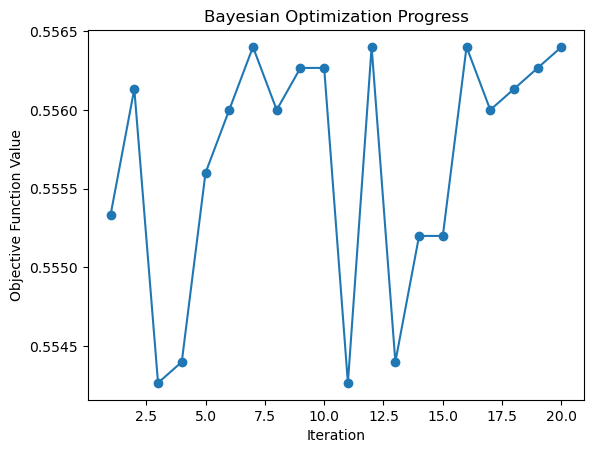

In [128]:
import matplotlib.pyplot as plt

# Run Bayesian Optimization
bo.maximize(init_points=5, n_iter=5)

# Extract information about the optimization process
iterations = list(range(1, len(bo.res) + 1))
objectives = [res['target'] for res in bo.res]

# Plot the optimization progress
plt.plot(iterations, objectives, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Bayesian Optimization Progress')
plt.show()


## LEARNING CURVE

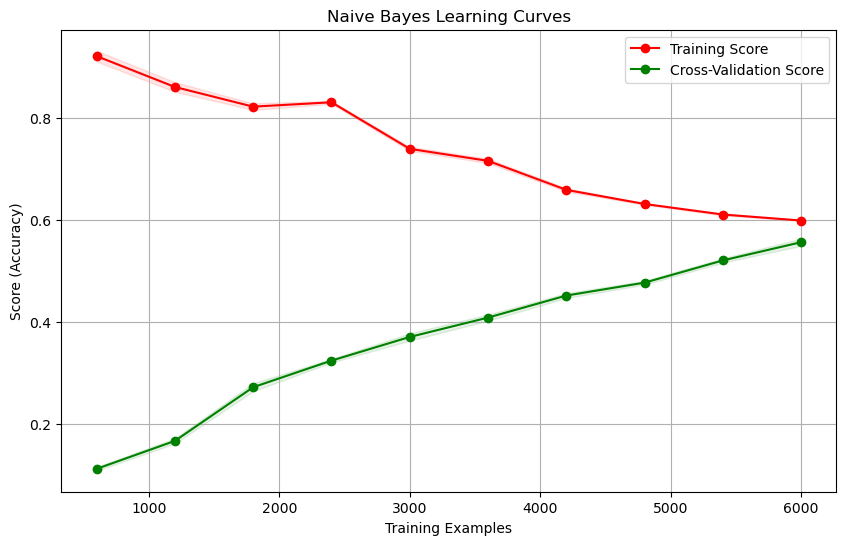

In [101]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a Naive Bayes model named 'nb_model'
train_sizes, train_scores, test_scores = learning_curve(
    nb_model_bayesian_opt, X, y_enc, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Naive Bayes Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score (Accuracy)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()


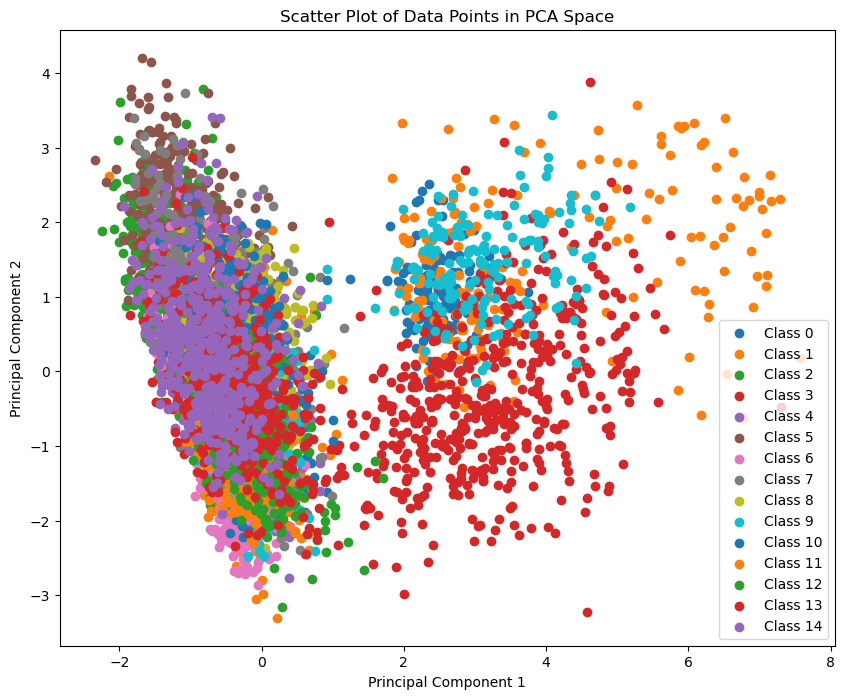

In [130]:
import matplotlib.pyplot as plt

# Assuming X_pca has two principal components (for simplicity)
# Replace 0 and 1 with the actual indices of the principal components you want to plot
x_component = 0
y_component = 1

plt.figure(figsize=(10, 8))

# Scatter plot for each class
for i in range(15):
    class_indices = np.where(y_enc == i)[0]
    plt.scatter(x_pca[class_indices, x_component], x_pca[class_indices, y_component], label=f'Class {i}')

plt.xlabel(f'Principal Component {x_component + 1}')
plt.ylabel(f'Principal Component {y_component + 1}')
plt.title('Scatter Plot of Data Points in PCA Space')
plt.legend()
plt.show()
